# Dhanvantari

In [ ]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from glob import glob 
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
#importn keras interface adam optimizer 
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential

In [ ]:

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)
#image size
IMAGE_SIZE = [224, 224]
#getting directive
train_dir = "/content/drive/MyDrive/sample/Train"
test_dir = "/content/drive/MyDrive/sample/Test"


In [ ]:
inception = InceptionV3(input_shape=IMAGE_SIZE +[3], weights='imagenet', include_top=False)
# not to train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/sample/Train/*')
x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=inception.input, outputs=prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/sample/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 31 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/sample/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 15 images belonging to 4 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/40
1/1 [==============================] - 15s 15s/step - loss: 1.6977 - accuracy: 0.1935 - val_loss: 7.3326 - val_accuracy: 0.5333
Epoch 2/40
1/1 [==============================] - 5s 5s/step - loss: 10.6727 - accuracy: 0.4194 - val_loss: 12.5962 - val_accuracy: 0.2667
Epoch 3/40
1/1 [==============================] - 5s 5s/step - loss: 16.8845 - accuracy: 0.2581 - val_loss: 8.5411 - val_accuracy: 0.4000
Epoch 4/40
1/1 [==============================] - 5s 5s/step - loss: 12.7281 - accuracy: 0.4194 - val_loss: 7.7328 - val_accuracy: 0.3333
Epoch 5/40
1/1 [==============================] - 5s 5s/step - loss: 8.9097 - accuracy: 0.3548 - val_loss: 4.3791 - val_accuracy: 0.6000
Epoch 6/40
1/1 [==============================] - 5s 5s/step - loss: 4.5850 - accuracy: 0.5161 - val_loss: 2.6938 - val_accuracy: 0.5333
Epoch 7/40
1/1 [==============================] - 5s 5s/step - loss: 2.2010 - accuracy: 0.5484 - val_loss: 2.6402 - val_accuracy: 0.6667
Epoch 8/40
1/1 [===================

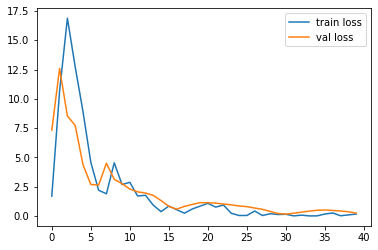

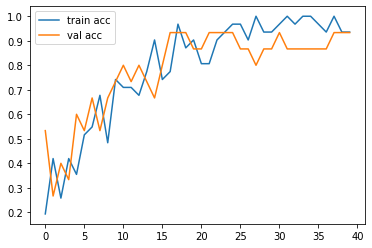

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/Resnet50.h5')